In [ ]:
import pandas as pd
data = pd.read_csv('INF2178_A4_data.csv')
data

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
290,367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
291,368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
292,370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331


In [ ]:
# Dropping the first unnamed column
data_cleaned = data.drop(columns=["Unnamed: 0"])

# Checking for missing values and data types
missing_values = data_cleaned.isnull().sum()
data_types = data_cleaned.dtypes

(missing_values, data_types)

(Subject ID     0
 MRI ID         0
 Group          0
 Visit          0
 MR Delay       0
 M/F            0
 Hand           0
 Age            0
 EDUC           0
 SES           15
 MMSE           1
 CDR            0
 eTIV           0
 nWBV           0
 ASF            0
 dtype: int64,
 Subject ID     object
 MRI ID         object
 Group          object
 Visit           int64
 MR Delay        int64
 M/F            object
 Hand           object
 Age             int64
 EDUC            int64
 SES           float64
 MMSE          float64
 CDR           float64
 eTIV            int64
 nWBV          float64
 ASF           float64
 dtype: object)

In [ ]:
# Impute missing MMSE and SES values with the median
data_cleaned['MMSE'].fillna(data_cleaned['MMSE'].median(), inplace=True)
data_cleaned['SES'].fillna(data_cleaned['SES'].median(), inplace=True)

missing_values_after = data_cleaned.isnull().sum()
missing_values_after

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

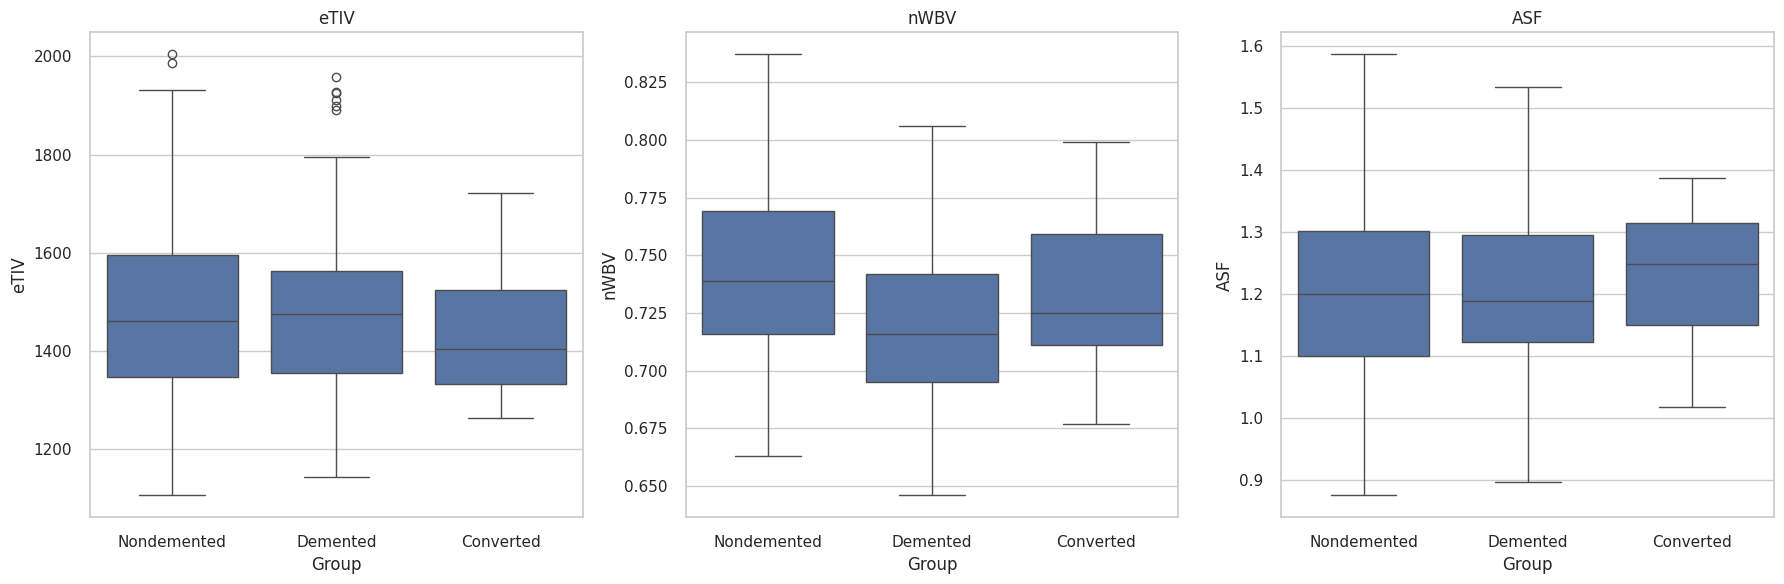

In [ ]:
# Plotting MRI-derived measures (eTIV, nWBV, ASF) by Group (Demented vs Nondemented)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# eTIV
sns.boxplot(ax=axes[0], x='Group', y='eTIV', data=data_cleaned)
axes[0].set_title('eTIV')

# nWBV
sns.boxplot(ax=axes[1], x='Group', y='nWBV', data=data_cleaned)
axes[1].set_title('nWBV')

# ASF
sns.boxplot(ax=axes[2], x='Group', y='ASF', data=data_cleaned)
axes[2].set_title('ASF')

plt.tight_layout()
plt.show()

# Mixed Effect ANOVA

In [ ]:
%pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.2 MB/s eta 0:00:00


# Mixed ANOVA for eTIV

In [ ]:
data['Group'] = data['Group'].astype('category')
anova_results_eTIV = pg.mixed_anova(dv='eTIV', between='Group', within='Visit', subject='Subject ID', data=data)
anova_results_eTIV

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,37424.708356,2,141,18712.354178,0.297278,0.743302,0.004199,NaN
1,Visit,5573.920139,1,141,5573.920139,9.224900,0.002845,0.061407,1.0
2,Interaction,1004.783164,2,141,502.391582,0.831464,0.437535,0.011656,NaN


<ipython-input-9-59fe0d48329c>:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Group', y='eTIV', hue='Visit', dodge=True, markers=['o', 's'],


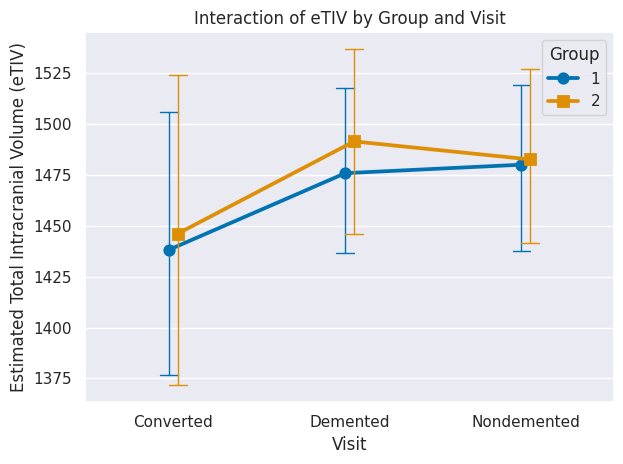

In [ ]:
sns.set()

# visualize the interaction effects
sns.pointplot(data=data, x='Group', y='eTIV', hue='Visit', dodge=True, markers=['o', 's'],
              capsize=.1, errwidth=1, palette='colorblind')

plt.title('Interaction of eTIV by Group and Visit')
plt.xlabel('Visit')
plt.ylabel('Estimated Total Intracranial Volume (eTIV)')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

In [ ]:
# test for Sphericity
pg.sphericity(data=data, dv='eTIV', within='Visit', subject='Subject ID')[-1]

1.0

In [ ]:
# test for Normality
data['group-visit'] = data['Group'].astype(str) + ' & ' + data['Visit'].astype(str)
pg.normality(data, dv='eTIV', group = 'group-visit')

,W,pval,normal
group-visit,,,
Nondemented & 1,0.968937,0.071927,True
Nondemented & 2,0.975840,0.194094,True
Demented & 1,0.963033,0.052404,True
Demented & 2,0.971023,0.149651,True
Converted & 1,0.934993,0.357941,True
Converted & 2,0.915798,0.252988,True


In [ ]:
# test for Homogeneity
print(pg.homoscedasticity(data[data['Visit'] == 1], dv='eTIV', group='Group'))
print(pg.homoscedasticity(data[data['Visit'] == 2], dv='eTIV', group='Group'))

               W      pval  equal_var
levene  0.942689  0.391921       True
               W      pval  equal_var
levene  0.405672  0.667304       True


# Mixed ANOVA for nWBV

In [ ]:
anova_results_nWBV = pg.mixed_anova(dv='nWBV', between='Group', within='Visit', subject='Subject ID', data=data)
anova_results_nWBV

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.033640,2,141,0.016820,6.712381,1.642113e-03,0.086934,NaN
1,Visit,0.006508,1,141,0.006508,94.251225,2.226896e-17,0.400641,1.0
2,Interaction,0.000212,2,141,0.000106,1.533508,2.193542e-01,0.021289,NaN


<ipython-input-11-a759196e119f>:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Group', y='nWBV', hue='Visit', dodge=True, markers=['o', 's'],


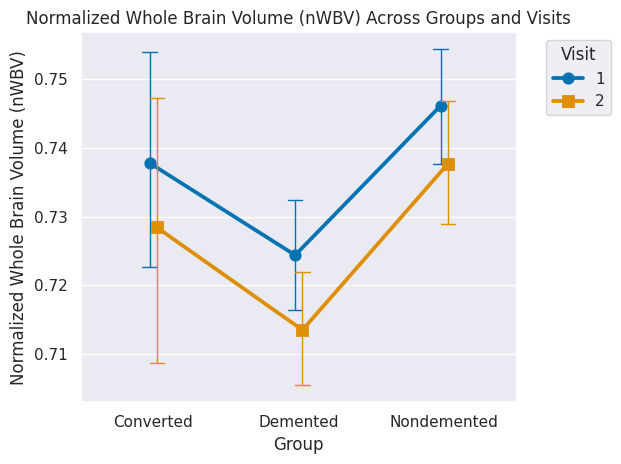

In [ ]:
# visualize the interaction effects
sns.set()
sns.pointplot(data=data, x='Group', y='nWBV', hue='Visit', dodge=True, markers=['o', 's'],
              capsize=.1, errwidth=1, palette='colorblind')

plt.title('Normalized Whole Brain Volume (nWBV) Across Groups and Visits')
plt.xlabel('Group')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.legend(title='Visit', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# test for Sphericity
pg.sphericity(data=data, dv='nWBV', within='Visit', subject='Subject ID')[-1]

1.0

In [ ]:
# test for Normality
pg.normality(data, dv='nWBV', group = 'group-visit')

,W,pval,normal
group-visit,,,
Nondemented & 1,0.988723,0.771999,True
Nondemented & 2,0.983956,0.510883,True
Demented & 1,0.992007,0.954626,True
Demented & 2,0.979475,0.384691,True
Converted & 1,0.933507,0.341468,True
Converted & 2,0.940329,0.502351,True


In [ ]:
# test for Homogeneity
print(pg.homoscedasticity(data[data['Visit'] == 1], dv='nWBV', group='Group'))
print(pg.homoscedasticity(data[data['Visit'] == 2], dv='nWBV', group='Group'))

               W     pval  equal_var
levene  1.045199  0.35422       True
               W      pval  equal_var
levene  0.298582  0.742338       True


# Mixed ANOVA for ASF

In [ ]:
anova_results_ASF = pg.mixed_anova(dv='ASF', between='Group', within='Visit', subject='Subject ID', data=data)
anova_results_ASF

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.018402,2,141,0.009201,0.233695,0.791909,0.003304,NaN
1,Visit,0.003160,1,141,0.003160,8.754326,0.003624,0.058458,1.0
2,Interaction,0.000742,2,141,0.000371,1.027595,0.360531,0.014366,NaN


<ipython-input-12-5d42576b3e13>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Group', y='ASF', hue='Visit', dodge=True, markers=['o', 's'],


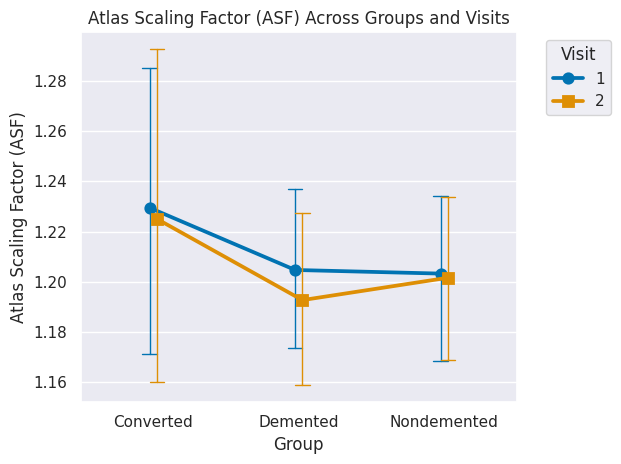

In [ ]:
# visualize the interaction effects
sns.pointplot(data=data, x='Group', y='ASF', hue='Visit', dodge=True, markers=['o', 's'],
              capsize=.1, errwidth=1, palette='colorblind')

plt.title('Atlas Scaling Factor (ASF) Across Groups and Visits')
plt.xlabel('Group')
plt.ylabel('Atlas Scaling Factor (ASF)')
plt.legend(title='Visit', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# test for Sphericity
pg.sphericity(data=data, dv='ASF', within='Visit', subject='Subject ID')[-1]

1.0

In [ ]:
# test for Normality
pg.normality(data, dv='ASF', group = 'group-visit')

,W,pval,normal
group-visit,,,
Nondemented & 1,0.989508,0.816622,True
Nondemented & 2,0.992769,0.960823,True
Demented & 1,0.986235,0.696870,True
Demented & 2,0.982480,0.519384,True
Converted & 1,0.957046,0.674286,True
Converted & 2,0.932284,0.404957,True


In [ ]:
# test for Homogeneity
print(pg.homoscedasticity(data[data['Visit'] == 1], dv='ASF', group='Group'))
print(pg.homoscedasticity(data[data['Visit'] == 2], dv='ASF', group='Group'))

               W      pval  equal_var
levene  0.879076  0.417337       True
               W     pval  equal_var
levene  0.391774  0.67659       True


# Power Analysis

In [ ]:
from statsmodels.stats.power import TTestIndPower


effect_size = 0.7
alpha = 0.05
power = 0.91

analysis = TTestIndPower()

sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0, alternative='two-sided')
print(f"Required sample size: {sample_size:.2f}")

Required sample size: 45.45


<ipython-input-19-8322827bb86f>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


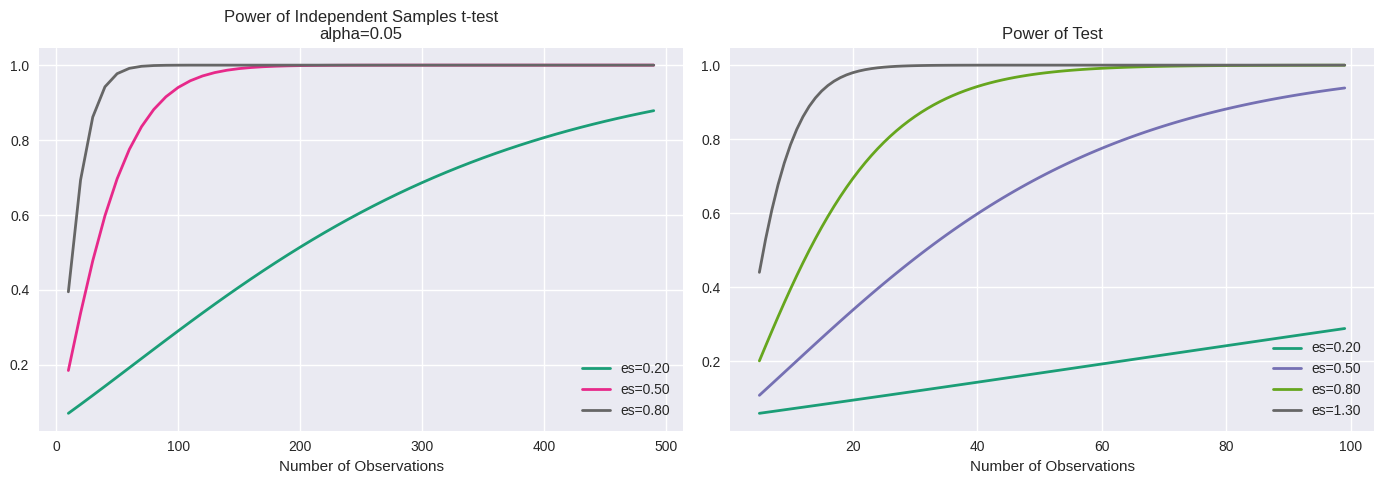

In [ ]:
import numpy as np

plt.style.use('seaborn')

# plot side-by-side
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# First Plot
effect_sizes_1 = np.array([0.2, 0.5, 0.8])
sample_sizes_1 = np.array(range(10, 500, 10))
power_analysis_1 = TTestIndPower()
power_analysis_1.plot_power(dep_var='nobs', nobs=sample_sizes_1,
                            effect_size=effect_sizes_1, alpha=0.05, ax=axs[0],
                            title='Power of Independent Samples t-test\nalpha=0.05')

# Second Plot
effect_sizes_2 = np.array([0.2, 0.5, 0.8, 1.3])
sample_sizes_2 = np.array(range(5, 100))
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes_2, effect_size=effect_sizes_2, ax=axs[1])

plt.tight_layout()
plt.show()